In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
df = pd.read_csv(r'diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [12]:
from sklearn.utils import resample


df_majority = df[df.diabetes==0]
df_minority = df[df.diabetes==1]
 

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=len(df_minority),  
                                 random_state=42)  
 

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 

df_downsampled.diabetes.value_counts()


0    8500
1    8500
Name: diabetes, dtype: int64

In [13]:
df_downsampled.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
21737,Female,35.0,0,0,No Info,27.32,3.5,200,0
62807,Male,66.0,0,0,No Info,27.32,4.5,145,0
38693,Male,32.0,0,0,never,32.71,6.6,90,0
72875,Male,46.0,0,0,No Info,32.78,4.0,80,0
14817,Female,22.0,0,0,never,23.51,4.5,158,0


In [14]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df_downsampled["gender"]=lbl.fit_transform(df_downsampled["gender"])
df_downsampled["smoking_history"]=lbl.fit_transform(df_downsampled["smoking_history"])

In [15]:
df_downsampled.shape

(17000, 9)

In [16]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [17]:
X_majority_downsampled, y_majority_downsampled = resample(X[y==0], y[y==0],
                                                         replace=False,
                                                         n_samples=len(y[y==1]),
                                                         random_state=42)

X_downsampled = pd.concat([X_majority_downsampled, X[y==1]])
y_downsampled = pd.concat([y_majority_downsampled, y[y==1]])

lbl = LabelEncoder()
X_downsampled['gender'] = lbl.fit_transform(X_downsampled['gender'])
X_downsampled['smoking_history'] = lbl.fit_transform(X_downsampled['smoking_history'])


X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

# Train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
y_pred = lr.predict( X_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8829411764705882


In [22]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[1488,  199],
       [ 199, 1514]], dtype=int64)

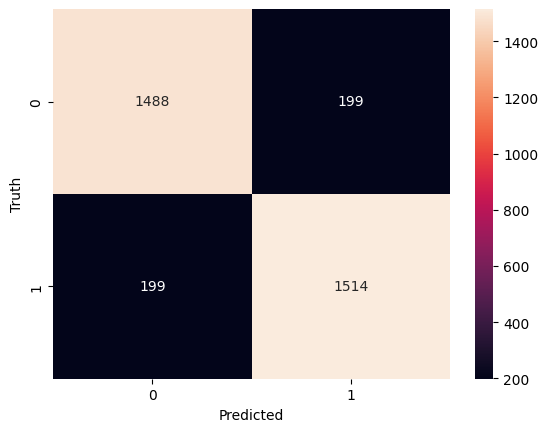

In [38]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision score
precision = precision_score(y_test, y_pred)

# Calculate recall score
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)


print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC-ROC: ", auc_roc)


Accuracy:  0.8829411764705882
Precision:  0.8838295388207823
Recall:  0.8838295388207823
F1-score:  0.8838295388207823
AUC-ROC:  0.8829343307619026
